In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

# import scipy.io

# Part 3: Point Process Model Validation

In [2]:
[STimes, SCount] = np.load('hw2problem2A.npy', allow_pickle=True)

In [ ]:
# probability * values for evey direction
# Log of this
# 

Using the data provided evaluate which set of parameters best describes the data. (Hint: You should calculate the likelihood of each model. In other words, calculate the probability of, e.g., data from 1000 trials of the simulated data given one model or the other?)

Log likelihood of the gaussian probability:

$$\sum log(\frac{1}{\sqrt{2\pi \sigma^2}}\cdot \exp (-\frac{1}{2} (x_n - \mu)^2)/\sigma^2)$$

In [60]:
def log_likelihood(x, sigma=9.5, mu=10.2): #Gaussian distribution
    
    whole_sum = 0
    denominator = 1/(np.sqrt(2*np.pi*sigma**2))
    
    for i in range(len(x)):
        exp_arg = -0.5*(x[i]-mu)**2/sigma**2
        whole_sum += np.log(denominator*np.exp(exp_arg))
    
    return whole_sum


def Poisson(x_d, lambda_d=9.8): # Likelihood equation for Poisson distribution
    
    whole_sum = 0
    
    for i in range(len(x_d)):
        
        log_term = x_d[i]*np.log(lambda_d)
        factorial = np.log(np.double(np.math.factorial(x_d[i])))
        whole_sum += -lambda_d + log_term - factorial
        
    return whole_sum

In [63]:
gaussian_likehood = log_likelihood(SCount[:1000])
poisson_likehood = Poisson(SCount[:1000])

print("Gaussian probability: ",gaussian_likehood)
print("Poisson probability: ",poisson_likehood)

# We know that the model that best fits the data is the maximum
if gaussian_likehood > poisson_likehood:
    print("The model that best fits the data is the Gaussian likelihood.")
    
elif gaussian_likehood < poisson_likehood:
    print("The model that best fits the data is the Poisson likelihood.")
    
else:
    print("Something strange is happening.")

Gaussian probability:  -3226.7710520327637
Poisson probability:  -2576.7662241483417
The model that best fits the data is the Poisson likelihood.


### Part b

In [64]:
# train_test_split function for selaecting random indices of the data.
# Consider the mean and stdev of the training data instead of the values given in part a
# Then, calculate the same you did for part a, but with the test data.

### Part c

Consider the spike frequency in 1s time window. Is it constant? Does it change?

In [3]:
def gaussian(x, sigma=9.5, mu=10.2):
    argument = -(x-mu)**2/(2*sigma**2)
    return np.exp(argument)/(sigma*np.sqrt(2*np.pi))

def poisson(n, lambd=9.8):
    return lambd**n*np.exp(-lambd)/math.factorial(n)

In [4]:
t = [i for i in range(40)]

gauss = [gaussian(t[i]) for i in range(len(t))]
poiss = [poisson(t[i]) for i in range(len(t))]

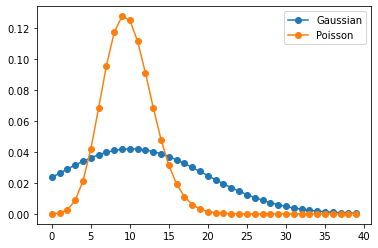

In [5]:
plt.plot(t, gauss, label="Gaussian", marker="o")
plt.plot(t, poiss, label="Poisson", marker="o")
plt.legend()
plt.show()

# Exercise 4: Describing real data

Spike times (in microseconds) for 10 neurons are given in spiketimes, a 10 element numpy array, where each element is a numpy vector of spiketimes. The time-varying stimulus is described in the stimulus numpy array, where the first column is timestamps (which follow regular 5 ms steps) and the second column is the direction of motion (in degrees) of a moving bar. Stimulus directions are randomized, each direction is maintained for 4 s, and directions are repeated 8 times. You can load the data into python using numpy.load():

In [8]:
[stimulus, spiketimes] = np.load('hw2problem3.npy', allow_pickle=True)

In [17]:
np.shape(SpikeTimes)
print(np.shape(stimulus))
print(len(stimulus))

(115200, 2)
115200


In [52]:
directions = [stimulus[i][1] for i in range(len(stimulus))]
print(directions[1601:2401]) # Each 800 values, there is a change in direction

[120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120,

In [23]:
possible_directions = [i*20 for i in range(19)]
possible_directions

[0,
 20,
 40,
 60,
 80,
 100,
 120,
 140,
 160,
 180,
 200,
 220,
 240,
 260,
 280,
 300,
 320,
 340,
 360]

In [ ]:
# stimulus direction vs average spikes per second.

In [73]:
len(stimulus)/800

144.0

In [77]:
average_spikes_and_direction = []
spikes = 0
i = 0

while i < round(len(stimulus)/800-1):
    for direction in possible_directions:
        if stimulus[i*800][1] == direction: # Sums the first 800 values and obtains the average spike counts in those 4 s.
            average_spikes_and_direction.append([np.sum(stimulus[i:800+i][1])/4, direction])
            i += 1
        
# print(average_spikes_and_direction)            

In [76]:
# Each direction is repeated 8 times

average_spikes = np.zeros(len(possible_directions))

for i in range(len(average_spikes)):
    for direction_i in range(len(possible_directions)):
        if average_spikes_and_direction[i][1] == possible_directions[direction_i]: # Add the value of averaged spikes
            average_spikes[direction_i] += average_spikes_and_direction[i][1]

average_spikes = average_spikes/8 # Obtainig the average because every direction is repeated 8 times
    

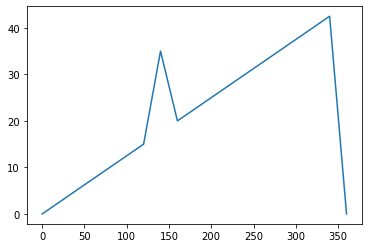

In [78]:
plt.plot(possible_directions, average_spikes)
plt.show()

In [103]:
possible_directions

[0,
 20,
 40,
 60,
 80,
 100,
 120,
 140,
 160,
 180,
 200,
 220,
 240,
 260,
 280,
 300,
 320,
 340,
 360]

In [117]:
stimulus[0][0]

2632478

In [122]:
spikes_and_direction = []

for neuron_i in range(len(spiketimes)): # For each neuron
    contador = 0
    
    for i in range(100):
        if  stimulus[0][0] < spiketimes[neuron_i][i]  and   spiketimes[neuron_i][i] <= stimulus[800][0]:
            contador+= 1
            
        elif spiketimes[neuron_i][i] > stimulus[800][0]:
            spikes_and_direction.append([contador, neuron_i])
#             append
#             print(contador)
            break
print(spikes_and_direction)

[[18, 0], [7, 1], [29, 2], [2, 3], [22, 4], [47, 5], [51, 6], [1, 7], [34, 8]]


In [115]:
spiketimes # Aqui hay un vector con los tiempos en los que disparo cada neurona de las 10.
# Entonces lo que queremos son ventanas de tiempo,
# Si estamos en la primer ventana a 240 grados, contar cuantas veces disparo la neurona 1, 2, 3 , etc

spikes_and_direction = []

for dir_i in range(len(possible_directions*8)): # Each direction is repeated 8 times
    
    for neuron_i in range(len(spiketimes)): # For each neuron
        spikes = 0
        
        for events_i in range(len(spiketimes[neuron_i])):
            # When we complete one iteration of direction, the events are shifted by 800. Sure???
            
            if spiketimes[neuron_i][events_i]>stimulus[dir_i+800*(dir_i+1)][0]: # Condition for breaking the cycle
                spikes_and_direction.append([spikes, stimulus[dir_i][1], neuron_i])
                #number of spikes in 4s and direction
                break # Finishes the cycle for this neuron and continues with next neuron
            
            # notice the following is a fixed window length until we change direction.
            elif stimulus[dir_i+800*dir_i][0]<spiketimes[neuron_i][events_i] and spiketimes[neuron_i][events_i]<stimulus[dir_i+800*(dir_i+1)][0]:
                spikes += 1 # Add one in the spikecounts for this neuron
            

print(spikes_and_direction)  

IndexError: index 115343 is out of bounds for axis 0 with size 115200

# Note how we are simply repeating the same spikecounts for each neuron. There is a problem

In [113]:
# Each direction is repeated 8 times

average_spikes = np.zeros(len(possible_directions))

for i in range(len(average_spikes)):
    for direction_i in range(len(possible_directions)):
        if spikes_and_direction[i][1] == possible_directions[direction_i]: # Add the value of averaged spikes
            average_spikes[direction_i] += spikes_and_direction[i][1]

average_spikes = average_spikes/32 # Obtaining the average because every direction is repeated 8 times for 4 seconds
# We are interested in the average per second.
    

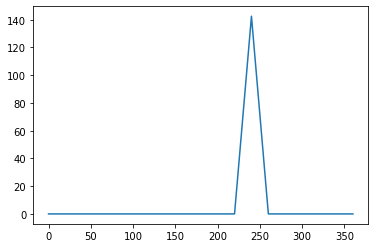

In [114]:
plt.plot(possible_directions, average_spikes)
plt.show()

In [ ]:
np.mean(SpikeCount) # This is the mean firing rate

In [ ]:
SCount

In [ ]:
SpikeTimes4 = mat4["spiketimes"][0]
stimulus = mat4["stimulus"]

In [ ]:
length = len(stimulus)
timestamp = np.zeros(length)
direction_of_motion = np.zeros(length)

for i in range(len(stimulus)):
    timestamp[i], direction_of_motion[i] = stimulus[i]

In [ ]:
# Object refresher, https://www.geeksforgeeks.org/python-object/
class Electrode:
  def __init__(self, spiketimes):
    self.spiketimes = spiketimes
    self.length = len(spiketimes)

In [ ]:
# For reshaping arrays, https://www.w3schools.com/python/numpy/numpy_array_reshape.asp
electrode1 = Electrode(SpikeTimes4[0, 0].reshape(np.size(SpikeTimes4[0, 0])))
electrode2 = Electrode(SpikeTimes4[0, 1].reshape(np.size(SpikeTimes4[0, 1])))
electrode3 = Electrode(SpikeTimes4[0, 2].reshape(np.size(SpikeTimes4[0, 2])))
electrode4 = Electrode(SpikeTimes4[0, 3].reshape(np.size(SpikeTimes4[0, 3])))
electrode5 = Electrode(SpikeTimes4[0, 4].reshape(np.size(SpikeTimes4[0, 4])))
electrode6 = Electrode(SpikeTimes4[0, 5].reshape(np.size(SpikeTimes4[0, 5])))
electrode7 = Electrode(SpikeTimes4[0, 6].reshape(np.size(SpikeTimes4[0, 6])))
electrode8 = Electrode(SpikeTimes4[0, 7].reshape(np.size(SpikeTimes4[0, 7])))
electrode9 = Electrode(SpikeTimes4[0, 8].reshape(np.size(SpikeTimes4[0, 8])))
electrode10 = Electrode(SpikeTimes4[0, 9].reshape(np.size(SpikeTimes4[0, 9])))

electrode10.length

In [ ]:

arr = SpikeTimes4[0, 0]
electrode1 = arr.reshape(np.size(arr)) # For reshaping arrays, https://www.w3schools.com/python/numpy/numpy_array_reshape.asp

arr = SpikeTimes4[0, 0]
electrode1 = arr.reshape(np.size(arr)) # For reshaping arrays, https://www.w3schools.com/python/numpy/numpy_array_reshape.asp

In [ ]:
plt.plot(electrode1, [1 for i in range(np.size(SpikeTimes4[0, 0]))], marker="o")
plt.show()